In [52]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import save_img
from PIL import Image
import random

In [2]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [3]:
data_dir = "C:/Users/saman/OneDrive - The University of Chicago/Spring 2024/ML and Predictive Analytics/Final Project/food_images"

class_folders = os.listdir(data_dir)

images = []
freshness_labels = []
fruit_types = []

for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)

    if os.path.isdir(class_path):
        freshness,fruit_type = class_folder.split("_")
        image_files = os.listdir(class_path)
        
        for image_file in image_files:
            images.append(os.path.join(class_path, image_file))
            freshness_labels.append(freshness)
            fruit_types.append(fruit_type)

In [4]:
df = pd.DataFrame(list(zip(images, freshness_labels, fruit_types)), columns=['image_path', 'freshness', 'fruit_type'])

In [5]:
df.head()

,image_path,freshness,fruit_type
0,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple
1,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple
2,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple
3,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple
4,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple


In [6]:
df['fruit_freshness'] = df[['freshness', 'fruit_type']].agg('_'.join, axis=1)

In [7]:
df['fruit_freshness'].unique()

array(['fresh_apple', 'fresh_banana', 'fresh_bittergourd',
       'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple',
       'stale_banana', 'stale_bittergourd', 'stale_capsicum',
       'stale_orange', 'stale_tomato'], dtype=object)

In [8]:
df.describe()

,image_path,freshness,fruit_type,fruit_freshness
count,14682,14682,14682,14682
unique,14682,2,6,12
top,C:/Users/saman/OneDrive - The University of Ch...,stale,apple,stale_apple
freq,1,7644,4035,2342


In [9]:
df_label=df['fruit_freshness'].value_counts().to_frame().reset_index()
df_label

,fruit_freshness,count
0,stale_apple,2342
1,fresh_apple,1693
2,stale_orange,1595
3,fresh_banana,1581
4,stale_banana,1467
5,fresh_orange,1466
6,fresh_capsicum,990
7,stale_tomato,982
8,fresh_tomato,981
9,stale_capsicum,901


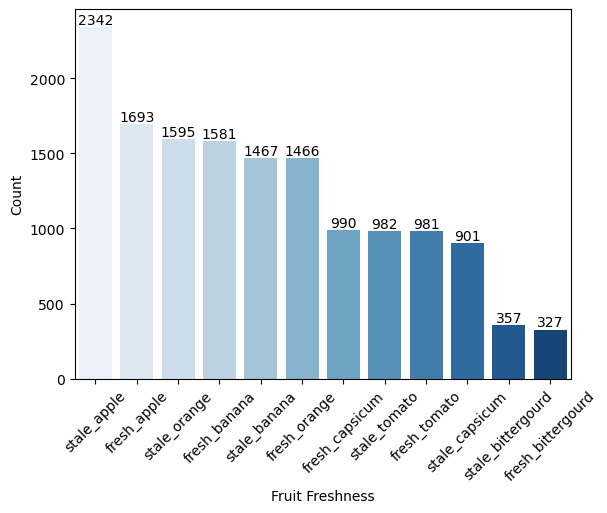

In [10]:
ax = sns.barplot(x = 'fruit_freshness',
            y = 'count',
            data = df_label,
           palette= 'Blues')
 
plt.xticks(rotation=45)
ax.set(xlabel='Fruit Freshness', ylabel='Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [11]:
widths = []
heights = []

for image_path in images:
    with Image.open(image_path) as img:
        width, height = img.size
        widths.append(width)
        heights.append(height)

df['width'] = widths
df['height'] = heights

In [12]:
df.head()

,image_path,freshness,fruit_type,fruit_freshness,width,height
0,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,458,476
1,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,470,386
2,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,436,452
3,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,412,418
4,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,388,428


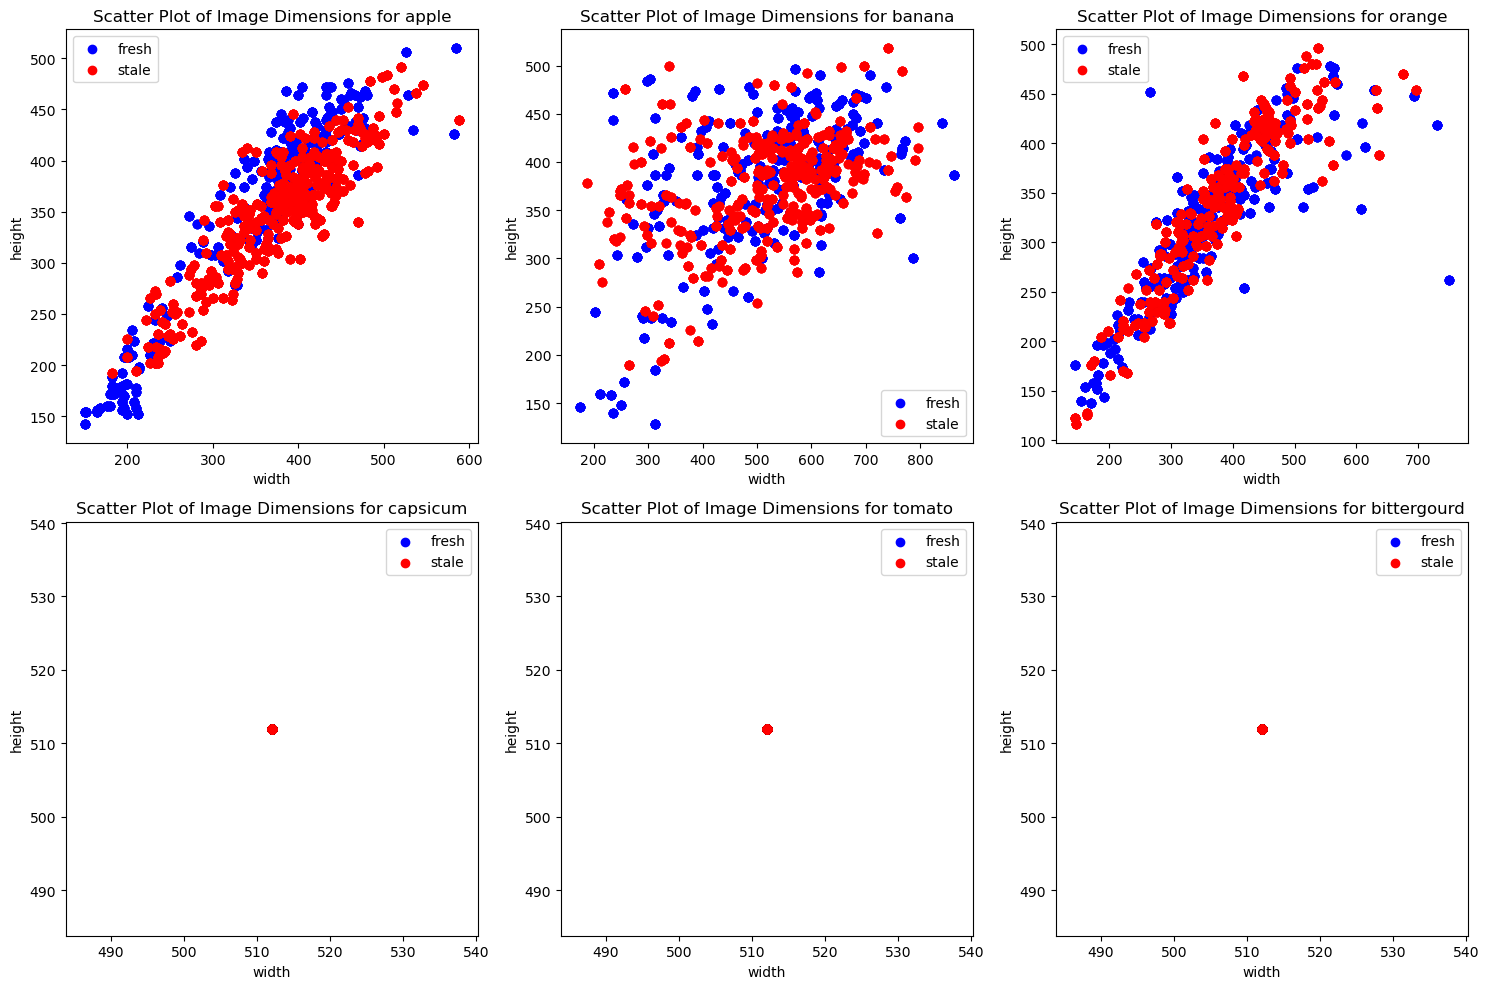

In [13]:
color_map = {'fresh': 'blue', 'stale': 'red'}

fruits = ['apple', 'banana', 'orange', 'capsicum', 'tomato', 'bittergourd']

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, fruit in enumerate(fruits):
    row = idx // num_cols
    col = idx % num_cols
    
    fruit_df = df[df['fruit_type'] == fruit]
    
    for freshness, group in fruit_df.groupby('freshness'):
        axes[row, col].scatter(group['width'], group['height'], color=color_map[freshness], label=f'{freshness}')
    
    axes[row, col].set_xlabel('width')
    axes[row, col].set_ylabel('height')
    axes[row, col].set_title(f'Scatter Plot of Image Dimensions for {fruit}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

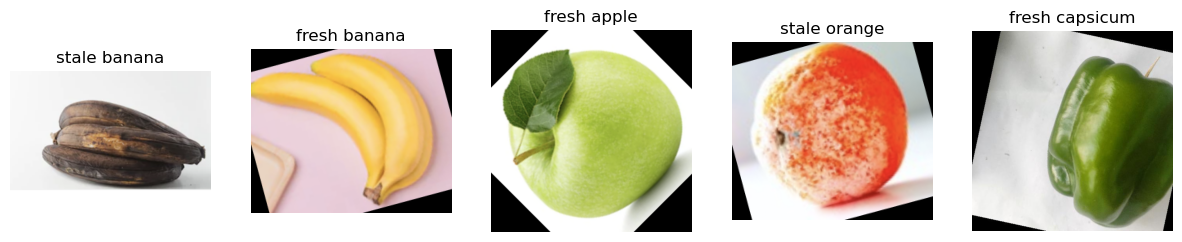

In [14]:
num_images_to_display = 5

random_samples = random.sample(list(zip(df['image_path'], df ['freshness'], df['fruit_type'])), num_images_to_display)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i, (image_path, freshness, fruit_type) in enumerate(random_samples):
    # Load and display the image
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(freshness + ' ' + fruit_type)

plt.show()

In [15]:
df.head()

,image_path,freshness,fruit_type,fruit_freshness,width,height
0,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,458,476
1,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,470,386
2,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,436,452
3,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,412,418
4,C:/Users/saman/OneDrive - The University of Ch...,fresh,apple,fresh_apple,388,428


In [16]:
df.drop(columns = ['height','width','freshness','fruit_type'], inplace= True)

In [17]:
df.head()

,image_path,fruit_freshness
0,C:/Users/saman/OneDrive - The University of Ch...,fresh_apple
1,C:/Users/saman/OneDrive - The University of Ch...,fresh_apple
2,C:/Users/saman/OneDrive - The University of Ch...,fresh_apple
3,C:/Users/saman/OneDrive - The University of Ch...,fresh_apple
4,C:/Users/saman/OneDrive - The University of Ch...,fresh_apple


In [18]:
from sklearn.model_selection import train_test_split

df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42)

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
num_classes = len(df['fruit_freshness'].unique())
img_height = 150
img_width = 150
batch_size = 32
epochs = 100

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image_path',
    y_col='fruit_freshness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=df_val,
    x_col='image_path',
    y_col='fruit_freshness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='fruit_freshness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 9396 validated image filenames belonging to 12 classes.
Found 2349 validated image filenames belonging to 12 classes.
Found 2937 validated image filenames belonging to 12 classes.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [23]:
baseline_model = Sequential()
baseline_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
baseline_model.add(MaxPool2D((2, 2)))
baseline_model.add(Flatten())
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(Dense(num_classes, activation='softmax'))

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

baseline_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 128)               22429824  
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 22432268 (85.57 MB)
Trainable params: 22432268 (85.57 MB)
Non-trainable params: 0 (0.00 Byte)
___________

In [24]:
history_baseline = baseline_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100


294/294 [==============================] - 157s 532ms/step - loss: 2.3644 - accuracy: 0.5003 - val_loss: 0.8805 - val_accuracy: 0.7033
Epoch 2/100
294/294 [==============================] - 146s 497ms/step - loss: 0.8932 - accuracy: 0.6872 - val_loss: 0.7083 - val_accuracy: 0.7501
Epoch 3/100
294/294 [==============================] - 146s 495ms/step - loss: 0.7364 - accuracy: 0.7361 - val_loss: 0.7543 - val_accuracy: 0.7497
Epoch 4/100
294/294 [==============================] - 146s 495ms/step - loss: 0.6627 - accuracy: 0.7640 - val_loss: 0.7619 - val_accuracy: 0.7361
Epoch 5/100
294/294 [==============================] - 146s 495ms/step - loss: 0.6089 - accuracy: 0.7833 - val_loss: 0.4639 - val_accuracy: 0.8416
Epoch 6/100
294/294 [==============================] - 146s 498ms/step - loss: 0.5636 - accuracy: 0.8001 - val_loss: 0.4913 - val_accuracy: 0.8242
Epoch 7/100
294/294 [==============================] - 144s 491ms/step - loss: 0.5237 - accuracy: 0.8152 - val_loss:

In [25]:
train_acc_baseline = history_baseline.history['accuracy'][-1] 
val_acc_baseline = history_baseline.history['val_accuracy'][-1] 

print('Train accuracy:', train_acc_baseline)
print('Validation accuracy:', val_acc_baseline)

Train accuracy: 0.8399319052696228
Validation accuracy: 0.8616432547569275


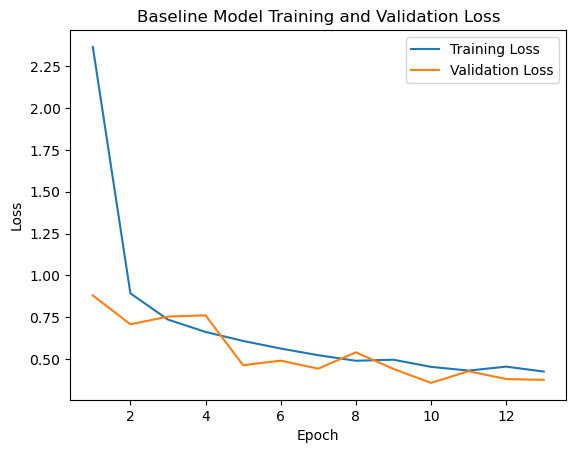

In [26]:
train_loss_baseline = history_baseline.history['loss']
val_loss_baseline = history_baseline.history['val_loss']

plt.plot(range(1, len(train_loss_baseline) + 1), train_loss_baseline, label='Training Loss')
plt.plot(range(1, len(val_loss_baseline) + 1), val_loss_baseline, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Baseline Model Training and Validation Loss')
plt.legend()
plt.show()

In [27]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_1.add(MaxPool2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPool2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPool2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 17, 17, 128)      

In [28]:
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100
294/294 [==============================] - 147s 496ms/step - loss: 1.1551 - accuracy: 0.5858 - val_loss: 0.5158 - val_accuracy: 0.8127
Epoch 2/100
294/294 [==============================] - 136s 461ms/step - loss: 0.5817 - accuracy: 0.7841 - val_loss: 0.4012 - val_accuracy: 0.8506
Epoch 3/100
294/294 [==============================] - 136s 462ms/step - loss: 0.4441 - accuracy: 0.8342 - val_loss: 0.3876 - val_accuracy: 0.8599
Epoch 4/100
294/294 [==============================] - 137s 466ms/step - loss: 0.3611 - accuracy: 0.8637 - val_loss: 0.3190 - val_accuracy: 0.8723
Epoch 5/100
294/294 [==============================] - 149s 508ms/step - loss: 0.2986 - accuracy: 0.8869 - val_loss: 0.2334 - val_accuracy: 0.9149
Epoch 6/100
294/294 [==============================] - 139s 472ms/step - loss: 0.2731 - accuracy: 0.8957 - val_loss: 0.2560 - val_accuracy: 0.9004
Epoch 7/100
294/294 [==============================] - 139s 472ms/step - loss: 0.2305 - accuracy: 0.9136 - val_loss: 0

In [29]:
train_acc_1 = history_1.history['accuracy'][-1]
val_acc_1 = history_1.history['val_accuracy'][-1]

print('Train accuracy:', train_acc_1)
print('Validation accuracy:', val_acc_1)

Train accuracy: 0.9576415419578552
Validation accuracy: 0.9765858054161072


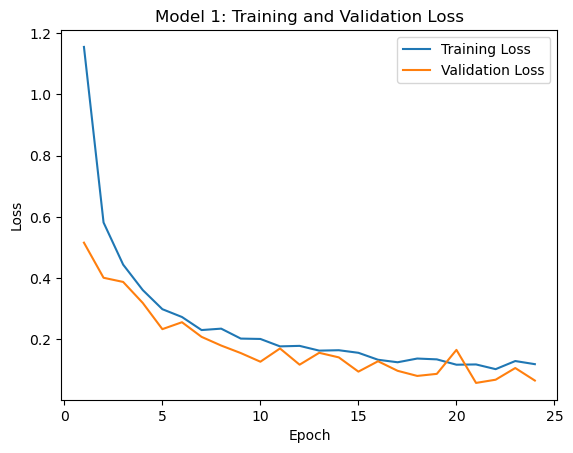

In [30]:
train_loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

plt.plot(range(1, len(train_loss_1) + 1), train_loss_1, label='Training Loss')
plt.plot(range(1, len(val_loss_1) + 1), val_loss_1, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1: Training and Validation Loss')
plt.legend()
plt.show()

In [81]:
model_2 = Sequential()
model_2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(img_height, img_width, 3)))
model_2.add(MaxPool2D((2, 2)))
model_2.add(Conv2D(64, (5, 5), activation='relu'))
model_2.add(MaxPool2D((2, 2)))
model_2.add(Conv2D(128, (5, 5), activation='relu'))
model_2.add(MaxPool2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 34, 34, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 128)       204928    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 128)      

In [82]:
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100
294/294 [==============================] - 247s 834ms/step - loss: 1.3461 - accuracy: 0.5335 - val_loss: 0.6109 - val_accuracy: 0.7999
Epoch 2/100
294/294 [==============================] - 172s 585ms/step - loss: 0.6789 - accuracy: 0.7521 - val_loss: 0.5150 - val_accuracy: 0.8191
Epoch 3/100
294/294 [==============================] - 183s 622ms/step - loss: 0.5055 - accuracy: 0.8115 - val_loss: 0.3588 - val_accuracy: 0.8629
Epoch 4/100
294/294 [==============================] - 171s 583ms/step - loss: 0.4378 - accuracy: 0.8333 - val_loss: 0.3022 - val_accuracy: 0.8876
Epoch 5/100
294/294 [==============================] - 177s 600ms/step - loss: 0.4055 - accuracy: 0.8480 - val_loss: 0.2690 - val_accuracy: 0.8910
Epoch 6/100
294/294 [==============================] - 172s 583ms/step - loss: 0.3262 - accuracy: 0.8734 - val_loss: 0.2674 - val_accuracy: 0.9059
Epoch 7/100
294/294 [==============================] - 164s 557ms/step - loss: 0.3432 - accuracy: 0.8738 - val_loss: 0

In [83]:
train_acc_2 = history_2.history['accuracy'][-1]  
val_acc_2 = history_2.history['val_accuracy'][-1]

print('Train accuracy:', train_acc_2)
print('Validation accuracy:', val_acc_2)

Train accuracy: 0.9130480885505676
Validation accuracy: 0.9071945548057556


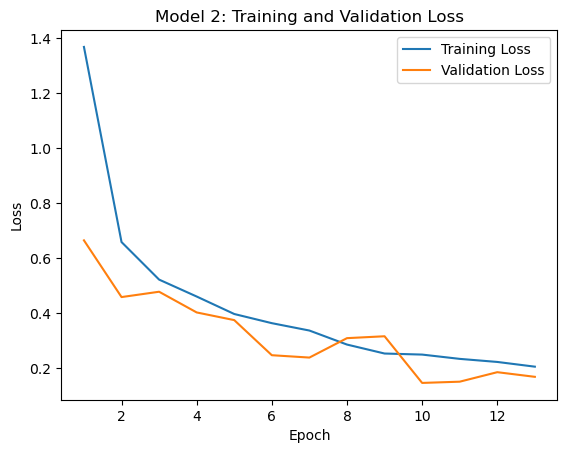

In [34]:
train_loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

plt.plot(range(1, len(train_loss_2) + 1), train_loss_2, label='Training Loss')
plt.plot(range(1, len(val_loss_2) + 1), val_loss_2, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 2: Training and Validation Loss')
plt.legend()
plt.show()

In [56]:
model_3 = Sequential()
model_3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_3.add(MaxPool2D((2, 2)))
model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(MaxPool2D((2, 2)))
model_3.add(Conv2D(256, (3, 3), activation='relu'))
model_3.add(MaxPool2D((2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 17, 17, 256)      

In [57]:
history_3 = model_3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100
294/294 [==============================] - 320s 1s/step - loss: 1.2525 - accuracy: 0.5550 - val_loss: 0.6031 - val_accuracy: 0.7999
Epoch 2/100
294/294 [==============================] - 281s 955ms/step - loss: 0.6029 - accuracy: 0.7786 - val_loss: 0.3652 - val_accuracy: 0.8655
Epoch 3/100
294/294 [==============================] - 276s 939ms/step - loss: 0.4648 - accuracy: 0.8278 - val_loss: 0.3425 - val_accuracy: 0.8782
Epoch 4/100
294/294 [==============================] - 284s 964ms/step - loss: 0.3779 - accuracy: 0.8606 - val_loss: 0.2933 - val_accuracy: 0.8940
Epoch 5/100
294/294 [==============================] - 272s 923ms/step - loss: 0.3328 - accuracy: 0.8761 - val_loss: 0.2389 - val_accuracy: 0.9085
Epoch 6/100
294/294 [==============================] - 261s 885ms/step - loss: 0.2982 - accuracy: 0.8853 - val_loss: 0.3092 - val_accuracy: 0.8931
Epoch 7/100
294/294 [==============================] - 258s 878ms/step - loss: 0.2840 - accuracy: 0.8923 - val_loss: 0.23

In [58]:
train_acc_3 = history_3.history['accuracy'][-1] 
val_acc_3 = history_3.history['val_accuracy'][-1]

print('Train accuracy:', train_acc_3)
print('Validation accuracy:', val_acc_3)

Train accuracy: 0.9434865713119507
Validation accuracy: 0.9548743963241577


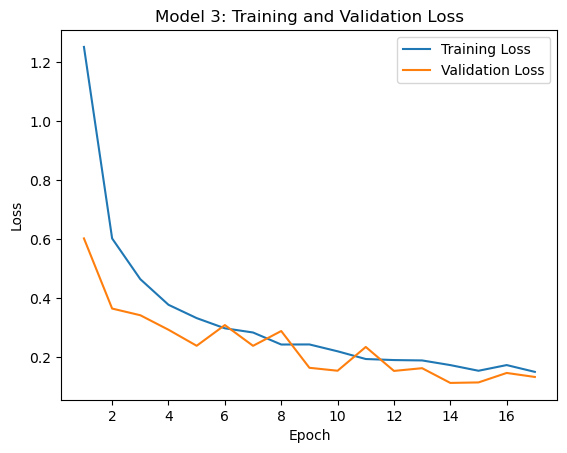

In [60]:
train_loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

plt.plot(range(1, len(train_loss_3) + 1), train_loss_3, label='Training Loss')
plt.plot(range(1, len(val_loss_3) + 1), val_loss_3, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 3: Training and Validation Loss')
plt.legend()
plt.show()

In [61]:
from keras.layers import Dropout

model_4 = Sequential()
model_4.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.25)) 
model_4.add(Conv2D(128, (3, 3), activation='relu'))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(256, (3, 3), activation='relu'))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 128)      

In [62]:
history_4 = model_4.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100
294/294 [==============================] - 284s 962ms/step - loss: 1.8219 - accuracy: 0.3705 - val_loss: 0.8639 - val_accuracy: 0.7084
Epoch 2/100
294/294 [==============================] - 293s 995ms/step - loss: 1.0009 - accuracy: 0.6417 - val_loss: 0.6613 - val_accuracy: 0.7697
Epoch 3/100
294/294 [==============================] - 293s 996ms/step - loss: 0.8522 - accuracy: 0.6952 - val_loss: 0.5731 - val_accuracy: 0.8131
Epoch 4/100
294/294 [==============================] - 292s 993ms/step - loss: 0.7801 - accuracy: 0.7214 - val_loss: 0.5309 - val_accuracy: 0.8144
Epoch 5/100
294/294 [==============================] - 292s 994ms/step - loss: 0.7030 - accuracy: 0.7389 - val_loss: 0.4789 - val_accuracy: 0.8216
Epoch 6/100
294/294 [==============================] - 326s 1s/step - loss: 0.6428 - accuracy: 0.7670 - val_loss: 0.4297 - val_accuracy: 0.8536
Epoch 7/100
294/294 [==============================] - 302s 1s/step - loss: 0.5857 - accuracy: 0.7896 - val_loss: 0.4175 

In [63]:
train_acc_4 = history_4.history['accuracy'][-1]  
val_acc_4 = history_4.history['val_accuracy'][-1]

print('Train accuracy:', train_acc_4)
print('Validation accuracy:', val_acc_4)

Train accuracy: 0.9161345362663269
Validation accuracy: 0.9518944025039673


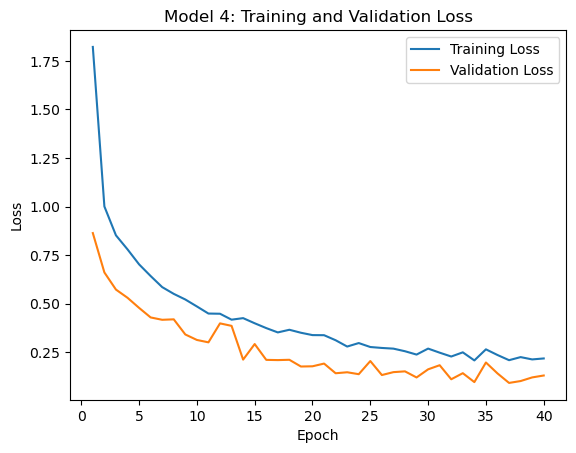

In [64]:
train_loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

plt.plot(range(1, len(train_loss_4) + 1), train_loss_4, label='Training Loss')
plt.plot(range(1, len(val_loss_4) + 1), val_loss_4, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 4: Training and Validation Loss')
plt.legend()
plt.show()

In [84]:
models = [baseline_model, model_1, model_2, model_3, model_4]

model_names = ["Baseline Model", "Model 1", "Model 2", "Model 3", "Model 4"]

for model, name in zip(models, model_names):
    loss, accuracy = model.evaluate(test_generator, verbose=0)
    
    print(f"{name} - Test Accuracy: {accuracy:.4f}")

results = {name: model.evaluate(test_generator, verbose=0)[1] for model, name in zip(models, model_names)}

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
print(df_results)

Baseline Model - Test Accuracy: 0.8686
Model 1 - Test Accuracy: 0.9843
Model 2 - Test Accuracy: 0.9278
Model 3 - Test Accuracy: 0.9680
Model 4 - Test Accuracy: 0.9656
                Test Accuracy
Baseline Model       0.868573
Model 1              0.984338
Model 2              0.927818
Model 3              0.967995
Model 4              0.965611


In [88]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, model_name, test_generator, true_labels, class_labels):
    test_generator.reset()
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    
    accuracy = accuracy_score(true_labels, predicted_classes)
    
    report = classification_report(true_labels, predicted_classes, target_names=class_labels, output_dict=True)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1-Score: {f1_score:.4f}")
    
    return {
        'Model Name': model_name,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

models = [baseline_model, model_1, model_2, model_3, model_4]
model_names = ["Baseline Model", "Model 1", "Model 2", "Model 3", "Model 4"]

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

results = [evaluate_model(model, name, test_generator, true_labels, class_labels) for model, name in zip(models, model_names)]

df_results = pd.DataFrame(results)
print(df_results)

92/92 [==============================] - 13s 139ms/step
Baseline Model - Test Accuracy: 0.0984
Baseline Model - Precision: 0.0969
Baseline Model - Recall: 0.0984
Baseline Model - F1-Score: 0.0973
92/92 [==============================] - 13s 140ms/step
Model 1 - Test Accuracy: 0.1062
Model 1 - Precision: 0.1059
Model 1 - Recall: 0.1062
Model 1 - F1-Score: 0.1060
92/92 [==============================] - 16s 168ms/step
Model 2 - Test Accuracy: 0.1018
Model 2 - Precision: 0.1008
Model 2 - Recall: 0.1018
Model 2 - F1-Score: 0.1011
92/92 [==============================] - 20s 218ms/step
Model 3 - Test Accuracy: 0.1015
Model 3 - Precision: 0.1009
Model 3 - Recall: 0.1015
Model 3 - F1-Score: 0.1011
92/92 [==============================] - 21s 224ms/step
Model 4 - Test Accuracy: 0.1066
Model 4 - Precision: 0.1073
Model 4 - Recall: 0.1066
Model 4 - F1-Score: 0.1069
       Model Name  Test Accuracy  Precision    Recall  F1-Score
0  Baseline Model       0.098400   0.096915  0.098400  0.097275
1   

In [86]:
def get_fruit_freshness(label):
    if label == 0:
        return 'Fresh Apple'
    elif label == 1:
        return 'Fresh Banana'
    elif label == 2:
        return 'Fresh Bittergourd'
    elif label == 3:
        return 'Stale Capsicum'
    elif label == 4:
        return 'Fresh Orange'
    elif label == 5:
        return 'Stale Tomato'
    elif label == 6:
        return 'Stale Apple'
    elif label == 7:
        return 'Stale Banana'
    elif label == 8:
        return 'Stale Bittergourd'
    elif label == 9:
        return 'Stale Capsicum'
    elif label == 10:
        return 'Stale Orange'
    elif label == 11:
        return 'Stale Tomato'
    else:
        return 'Unknown'

1/1 [==============================] - 0s 51ms/step


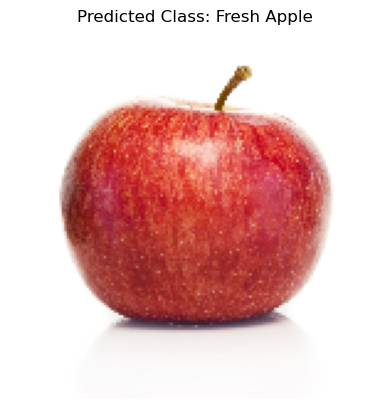

In [101]:
img_path = 'fresh apple.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model_4.predict(img_array)

predicted_class_index = np.argmax(predictions)

predicted_class_label = get_fruit_freshness(predicted_class_index)

plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: {}'.format(predicted_class_label))
plt.show()

1/1 [==============================] - 0s 48ms/step


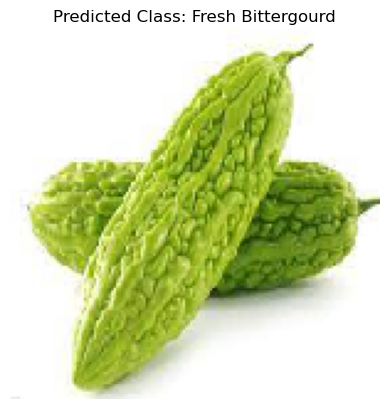

In [102]:
img_path = 'fresh bittergourd.jpeg'
img = image.load_img(img_path, target_size=(img_height, img_width))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0 

predictions = model_4.predict(img_array)

predicted_class_index = np.argmax(predictions)

predicted_class_label = get_fruit_freshness(predicted_class_index)

plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: {}'.format(predicted_class_label))
plt.show()

1/1 [==============================] - 0s 51ms/step


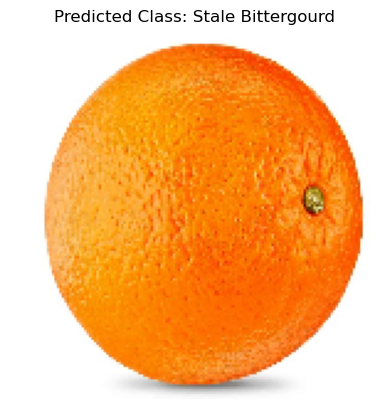

In [103]:
img_path = 'fresh orange.jpeg'
img = image.load_img(img_path, target_size=(img_height, img_width))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0 

predictions = model_4.predict(img_array)

predicted_class_index = np.argmax(predictions)

predicted_class_label = get_fruit_freshness(predicted_class_index)

plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: {}'.format(predicted_class_label))
plt.show()